In [35]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import make_classification, load_iris

import matplotlib.pyplot as plt

import matplotlib as cm 

import keras

from keras.models import Sequential 

from keras.layers import Dense 

from sklearn.preprocessing import StandardScaler,LabelBinarizer 

from sklearn.utils import shuffle 

sns.set(color_codes = True) 



In [36]:
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [37]:
data = pd.DataFrame(data =np.c_[data['data'],data['target']],columns=data['feature_names']+['target'])

data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


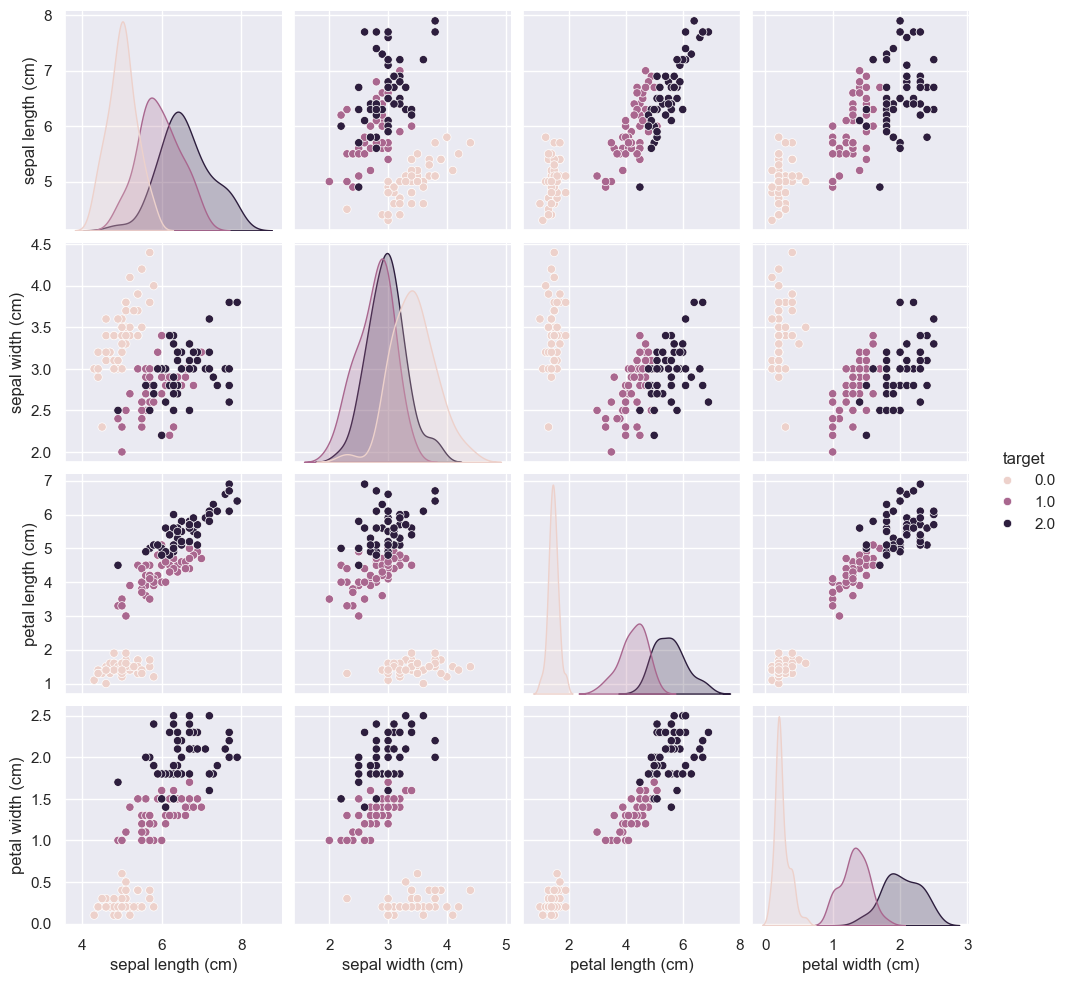

In [38]:
sns.pairplot(data= data[data.columns[0:6]],hue='target')
plt.show()
             
# sns.pairplot(data, 
#     hue=None,  
#     hue_order=None,  
#     palette=None,  
#     vars=None,  
#     x_vars=None,  
#     y_vars=None,  
#     kind='scatter',  
#     diag_kind='auto',  
#     markers=None,  
#     height=2.5,  
#     aspect=1,  
#     corner=False,  
#     dropna=False,  
#     plot_kws=None,  
#     diag_kws=None,  
#     grid_kws=None,  
#     size=None)
# plt.show()

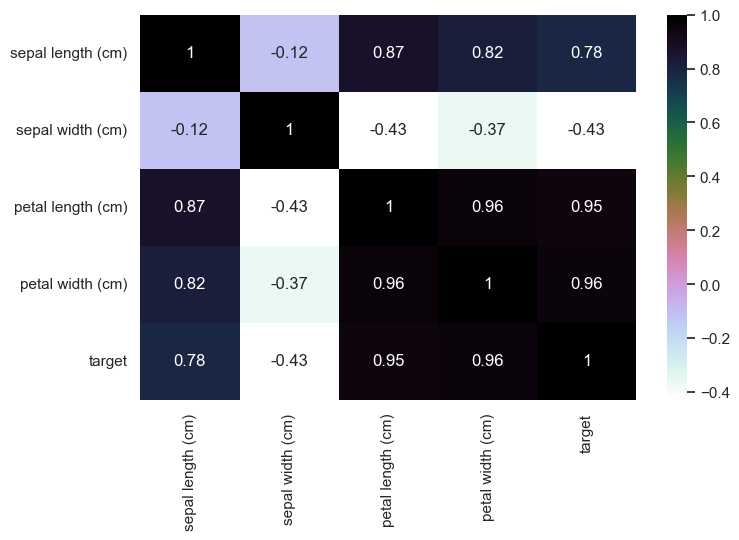

In [39]:
plt.figure(figsize=(8,5))

#sns.heatmap(data.corr(),annot=True)

# corelation = data.corr()
# sns.heatmap(corelation,xticklabels = corelation.columns,yticklabels = corelation.columns,annot = True)

sns.heatmap(data.corr(),annot=True,cmap='cubehelix_r')
plt.show()

In [40]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [41]:
data = shuffle(data)

In [42]:
x = data[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]

y = data[['target']]

y_true = y.copy()


In [43]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
125,7.2,3.2,6.0,1.8
2,4.7,3.2,1.3,0.2
52,6.9,3.1,4.9,1.5
93,5.0,2.3,3.3,1.0
113,5.7,2.5,5.0,2.0
...,...,...,...,...
85,6.0,3.4,4.5,1.6
23,5.1,3.3,1.7,0.5
86,6.7,3.1,4.7,1.5
96,5.7,2.9,4.2,1.3


In [44]:
y

,target
125,2.0
2,0.0
52,1.0
93,1.0
113,2.0
...,...
85,1.0
23,0.0
86,1.0
96,1.0


In [45]:
# Train The Model  

x = StandardScaler().fit_transform(x)
y = LabelBinarizer().fit_transform(y)

In [46]:
y

array([[0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1,

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,mean_squared_error,accuracy_score

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 101)


In [48]:
model = Sequential()

model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=3, activation='softmax'))  # Change units to 3 for three classes

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=120, validation_data=(x_test, y_test))


Epoch 1/120
4/4 [==============================] - 2s 119ms/step - loss: 1.0726 - accuracy: 0.5583 - val_loss: 1.0242 - val_accuracy: 0.8667
Epoch 2/120
4/4 [==============================] - 0s 18ms/step - loss: 1.0253 - accuracy: 0.7417 - val_loss: 0.9915 - val_accuracy: 0.8333
Epoch 3/120
4/4 [==============================] - 0s 17ms/step - loss: 0.9934 - accuracy: 0.7417 - val_loss: 0.9612 - val_accuracy: 0.8333
Epoch 4/120
4/4 [==============================] - 0s 15ms/step - loss: 0.9616 - accuracy: 0.7417 - val_loss: 0.9287 - val_accuracy: 0.8333
Epoch 5/120
4/4 [==============================] - 0s 16ms/step - loss: 0.9303 - accuracy: 0.7500 - val_loss: 0.8932 - val_accuracy: 0.8333
Epoch 6/120
4/4 [==============================] - 0s 10ms/step - loss: 0.8957 - accuracy: 0.7667 - val_loss: 0.8557 - val_accuracy: 0.8333
Epoch 7/120
4/4 [==============================] - 0s 18ms/step - loss: 0.8594 - accuracy: 0.7667 - val_loss: 0.8167 - val_accuracy: 0.8667
Epoch 8/120
4/4 [==

In [49]:
y_pred = model.predict(x_test)

y_test 

y_test = np.argmax(y_test,axis=1)

1/1 [==============================] - 0s 171ms/step


In [50]:
cm = confusion_matrix(y_test.tolist(),y_pred.tolist())

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

[Text(0, 0.5, 'setosa'), Text(0, 1.5, 'versicolor'), Text(0, 2.5, 'verginica')]

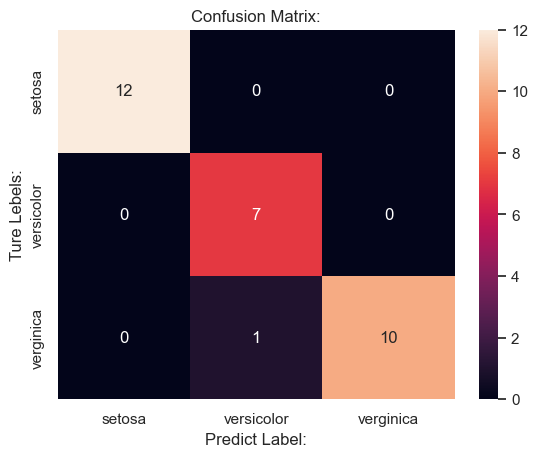

In [ ]:
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax = ax)

ax.set_xlabel('Predict Label:'); ax.set_ylabel('Ture Lebels:')
ax.set_title('Confusion Matrix:');
ax.xaxis.set_ticklabels(['setosa','versicolor','verginica'])
ax.yaxis.set_ticklabels(['setosa','versicolor','verginica'])

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test.tolist(),y_pred.tolist(),average='macro')

(0.9583333333333334, 0.9696969696969697, 0.9619047619047619, None)

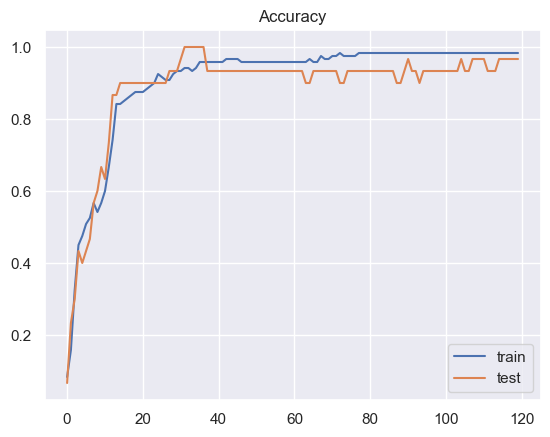

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'])
plt.show()

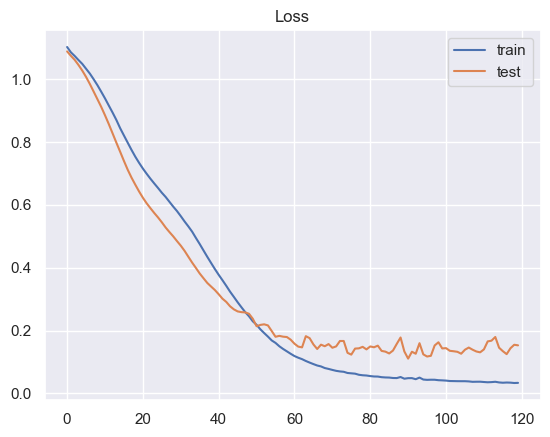

In [ ]:
# history.history

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'])
plt.show()

In [ ]:
# Assuming y_test is one-hot encoded or consists of integer class labels
# If it's not one-hot encoded, you can use np.argmax to convert it
y_true = np.argmax(y_test, axis=1) if len(y_test.shape) > 1 else y_test

# Assuming y_pred is obtained using model.predict as shown in the previous response
y_pred = np.argmax(model.predict(x_test), axis=1)

cm = confusion_matrix(y_true, y_pred)

# Predict raw probabilities for each class
#y_pred = model.predict(x_test)  # Sequential.predict_classes is deprecated and will be removed after 2021-01-01 

1/1 [==============================] - 0s 69ms/step


<Axes: >

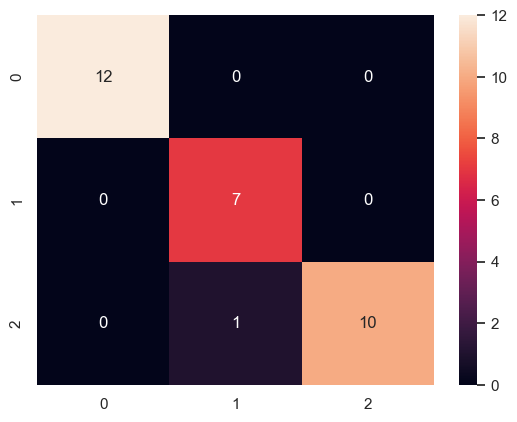

In [ ]:
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax = ax)

In [ ]:
cm = confusion_matrix(y_test.tolist(),y_pred.tolist())

In [ ]:
# Model 

model = Sequential()

model.add(Dense( 12, input_dim=4,activation = 'relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=10,activation='relu'))
model.add(Dense(units=15,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(x_train, y_train,
        #   batch_size=32,
          epochs=120,
        #   verbose=1,
          validation_data=(x_test, y_test))

# score = model.evaluate(x_test, y_test, verbose=0)


'''model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=[
    28, 28, 1]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax'))
# Configure the model for training and compile it with appropriate loss function and optimizer
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
# Generate dummy data to train on
history = model.fit(x_train, y_train,
          batch_size=32,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# Save the trained model as a .hdf5 file
model.save('my_model.h5')
# Make predictions on the test set
y_pred = model.predict(x_test)
print(y_pred)'''
# </s>
# import { Component } from '@angular/core';
# import { Router } from "@angular/router";
# import { FormGroup, FormBuilder, Validators } from '@angular/forms';
# import { first } from 'rxjs/operators';
# @Component({ templateUrl: 'login.html' })
# export class LoginComponent {
    
#     loginForm: FormGroup;
#     loading = false;
#     submitted = false;
#     returnUrl: string;
#     error = '';

#     constructor(
#         private formBuilder: FormBuilder,
#         private route: Router
#     ) { }

#     ngOnInit() {
#         this.loginForm = this.formBuilder.group({
#             username: ['', Validators.required],
#             password: ['', Validators.required]
#         });
        
# }
# // convenience getter for easy access to form fields
# get f() { return this.loginForm.controls; }
# onSubmit() {
#     this.submitted = true;

#     // stop here if form is invalid
#     if (this.loginForm.invalid) {
#         return;
#     }
#     this.loading = true;
#     this.route.navigate(['dashboard']);

# }

Epoch 1/120


ValueError: in user code:

    File "c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 3) and (None, 15) are incompatible


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


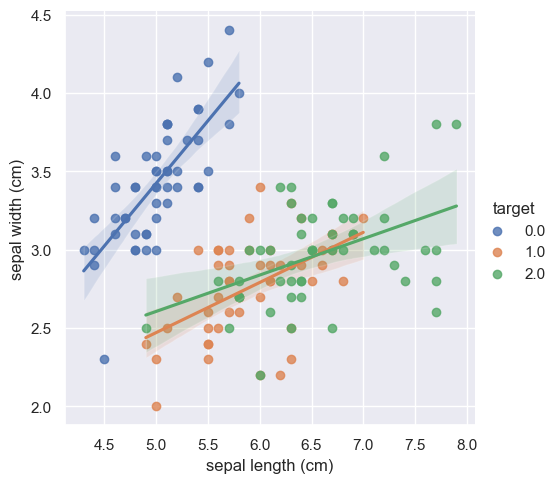

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


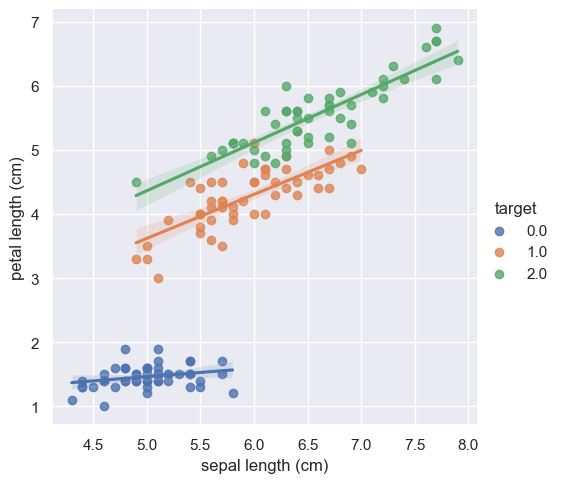

In [ ]:
sns.lmplot(x='sepal length (cm)',y='sepal width (cm)',data = data,hue = 'target')
plt.show()

sns.lmplot(x='sepal length (cm)',y='petal length (cm)',data = data,hue='target') #hue = col 
plt.show()

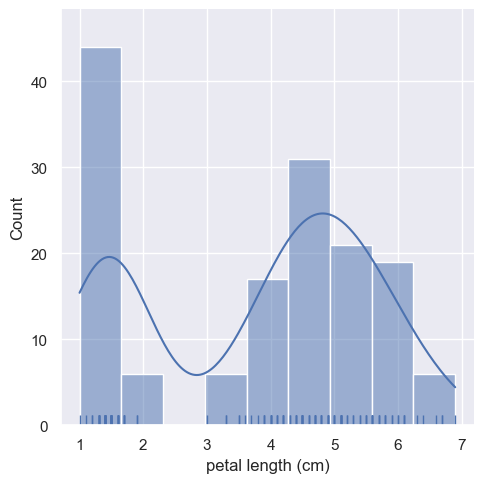

In [54]:
sns.displot(data['petal length (cm)'],kde = True, rug = True)

plt.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

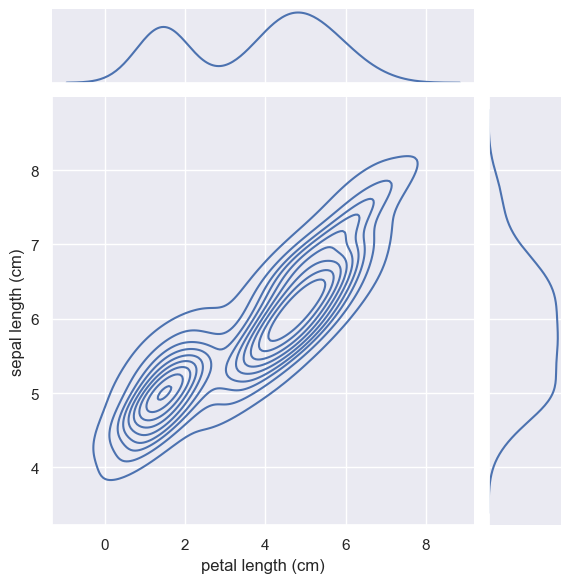

In [ ]:
# sns.jointplot(x=data['petal length (cm)'],y=data['petal width (cm)']) #kind=hex,resid,reg,kde,
# plt.show()

sns.jointplot(x=data['petal length (cm)'],y=data['sepal length (cm)'],kind='kde') 
plt.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

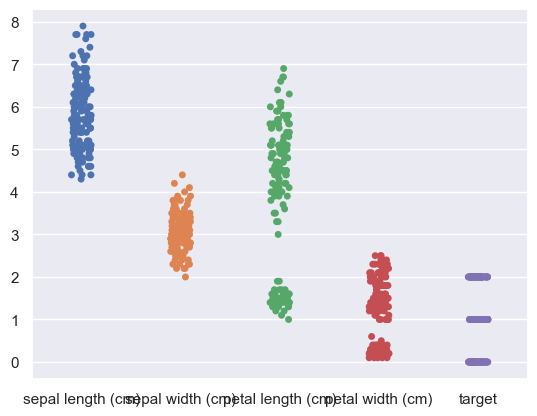

In [ ]:
sns.stripplot(data,jitter=True) #jitter = True

plt.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

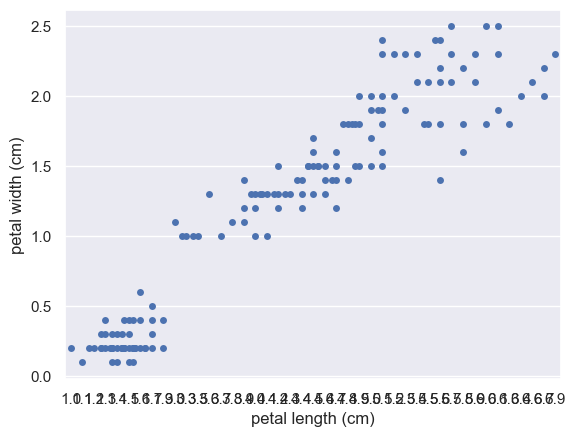

In [ ]:
sns.swarmplot(x=data['petal length (cm)'],y=data['petal width (cm)']) 

plt.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

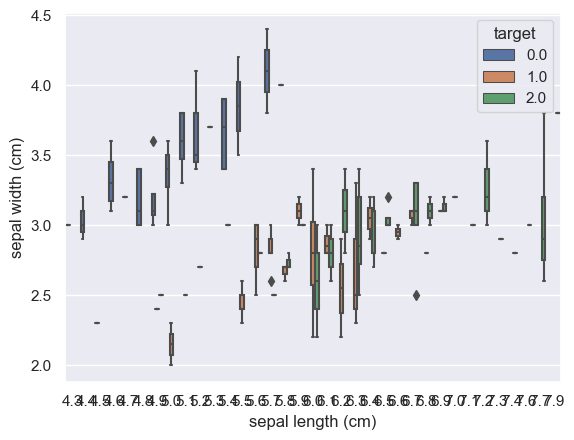

In [ ]:
sns.boxplot(x=data['sepal length (cm)'],y=data['sepal width (cm)'],hue=data['target']) # hue = col
plt.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

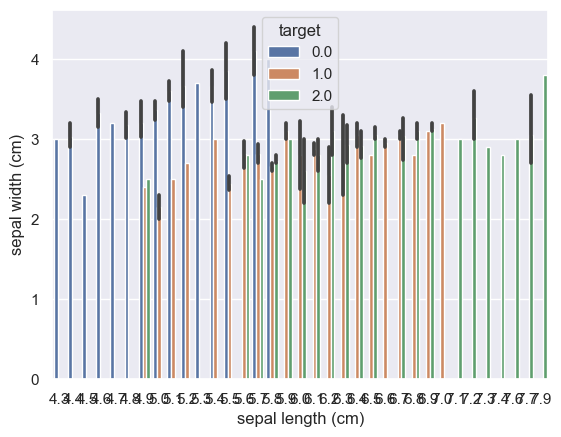

In [ ]:
sns.barplot(x=data['sepal length (cm)'],y=data['sepal width (cm)'] ,hue =data['target'])  # bootstrap and aggregation function

plt.show() 

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


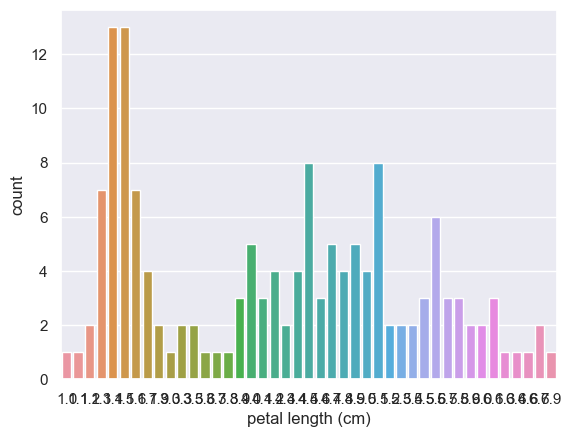

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


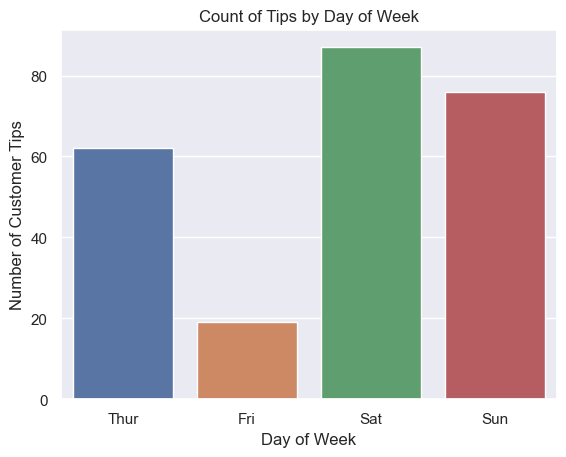

In [ ]:
sns.countplot(x=data['petal length (cm)'])
plt.show() 

tips = sns.load_dataset("tips")

ax = sns.countplot(x="day", data=tips)

ax.set(xlabel="Day of Week", 
       ylabel="Number of Customer Tips",
       title="Count of Tips by Day of Week")

plt.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

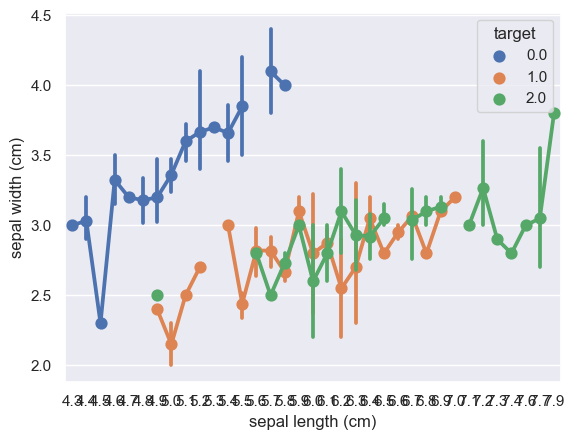

In [ ]:
sns.pointplot(x=data['sepal length (cm)'],y=data['sepal width (cm)'] , hue=data['target']) 

plt.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

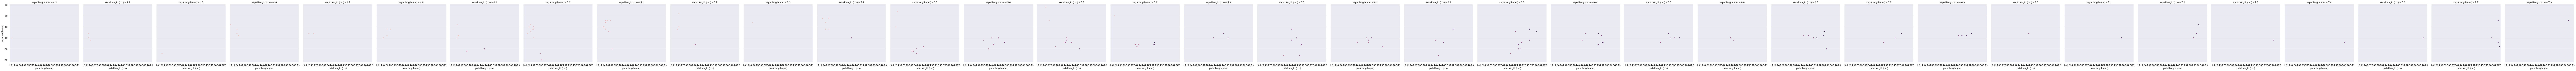

In [ ]:
sns.catplot(x=data['petal length (cm)'],y=data['sepal width (cm)'],hue=data['petal width (cm)'],
               col=data['sepal length (cm)'],data = data,kind='swarm')   
#kind = swarm , point, bar , don't pass two col for kind = count , box, violin , strip 

plt.show()

tips = sns.load_dataset("tips")

g = sns.catplot(x="time", y="total_bill", 
                   data=tips, kind="box")

g.set_axis_labels("Time of Day", "Total Bill") 
g.set_titles("Box Plot of Total Bill by Time of Day")

plt.show()